<a href="https://colab.research.google.com/github/naveenraj208/ml-lab-work/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Summation Unit: Computes weighted sum of inputs and weights
def summation_unit(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# Activation functions: Step, Bipolar Step, Sigmoid, TanH, ReLU, Leaky ReLU
def step_activation(x):
    return 1 if x > 0 else 0

def bipolar_step_activation(x):
    return 1 if x > 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x


In [3]:
# Error Comparator: Calculates squared error for error comparison
def error_comparator(actual, predicted):
    return 0.5 * (actual - predicted) ** 2


In [4]:
# Perceptron Learning Function: Modular learning process for any activation function
def perceptron_learning(epochs, inputs, outputs, weights, bias, learning_rate, activation_func):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(inputs[i], weights, bias)
            prediction = activation_func(weighted_sum)
            error = outputs[i] - prediction
            weights += learning_rate * error * np.array(inputs[i])
            bias += learning_rate * error
            total_error += error ** 2
        errors.append(total_error)
        if total_error <= 0.002:  # Convergence condition
            break
    return weights, bias, errors


In [5]:
# Function for plotting error over epochs
import matplotlib.pyplot as plt

def plot_errors(errors, title="Error over Epochs"):
    plt.plot(range(len(errors)), errors)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(title)
    plt.grid(True)
    plt.show()


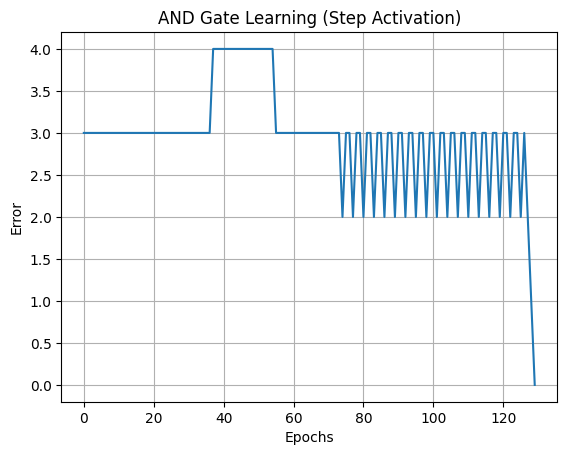

Final Weights: [0.1  0.05], Final Bias: -0.10000000000000765


In [8]:
import numpy as np
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # AND gate inputs
outputs = np.array([0, 0, 0, 1])  # AND gate outputs

# Initial setup for learning process
weights = np.array([0.2, -0.75])  # Initial weights
bias = 10  # Initial bias
learning_rate = 0.05
epochs = 1000

# Learn with Step Activation Function
final_weights, final_bias, errors = perceptron_learning(
    epochs, inputs, outputs, weights, bias, learning_rate, step_activation
)

# Plot the errors across epochs
plot_errors(errors, "AND Gate Learning (Step Activation)")
print(f"Final Weights: {final_weights}, Final Bias: {final_bias}")


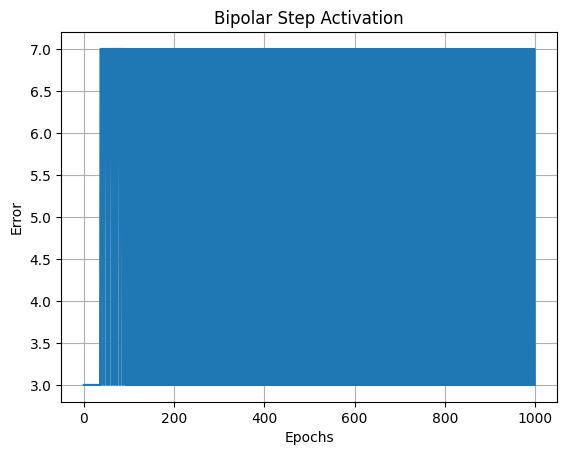

Final Weights: [0.1  0.05], Final Bias: -0.0999999999999975


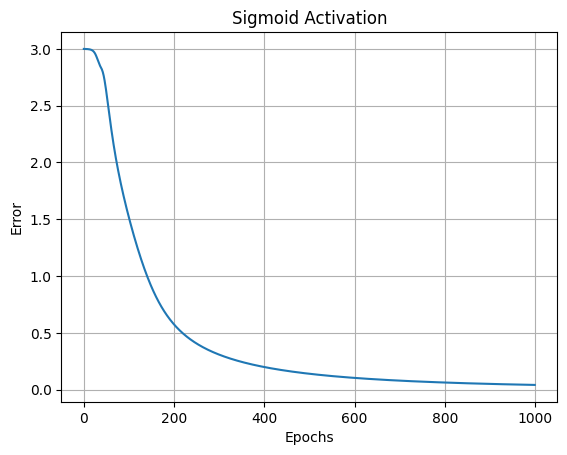

Final Weights: [3.97083321 3.96394835], Final Bias: -6.135313078734431


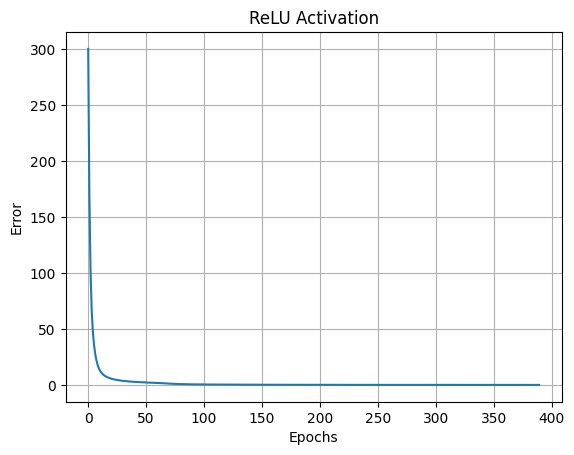

Final Weights: [0.95116001 0.94981086], Final Bias: -0.9277447198109582


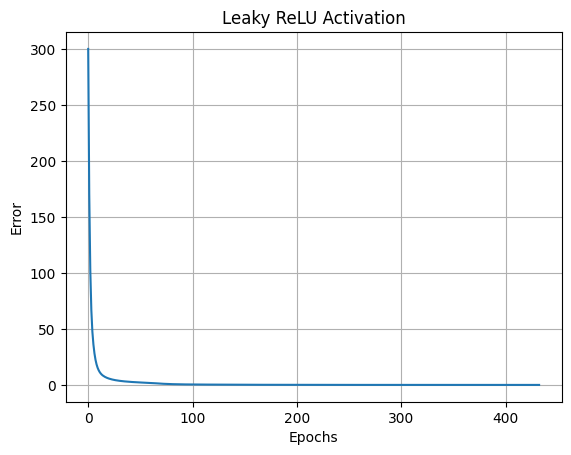

Final Weights: [0.9530528  0.95175339], Final Bias: -0.9292737770836154


In [9]:
# Test different activation functions
def test_activation_function(epochs, inputs, outputs, activation_func, activation_name):
    weights = np.array([0.2, -0.75])
    bias = 10
    learning_rate = 0.05
    final_weights, final_bias, errors = perceptron_learning(epochs, inputs, outputs, weights, bias, learning_rate, activation_func)
    plot_errors(errors, f"{activation_name} Activation")
    print(f"Final Weights: {final_weights}, Final Bias: {final_bias}")

# Run tests for Bipolar Step, Sigmoid, ReLU, Leaky ReLU
test_activation_function(epochs, inputs, outputs, bipolar_step_activation, "Bipolar Step")
test_activation_function(epochs, inputs, outputs, sigmoid_activation, "Sigmoid")
test_activation_function(epochs, inputs, outputs, relu_activation, "ReLU")
test_activation_function(epochs, inputs, outputs, leaky_relu_activation, "Leaky ReLU")


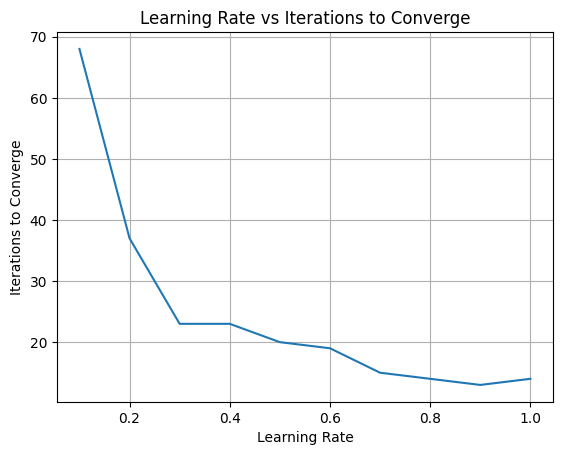

In [10]:
# Test varying learning rates
def test_learning_rates(learning_rates, inputs, outputs, activation_func):
    iterations = []
    for lr in learning_rates:
        weights = np.array([0.2, -0.75])
        bias = 10
        _, _, errors = perceptron_learning(epochs, inputs, outputs, weights, bias, lr, activation_func)
        iterations.append(len(errors))
    plt.plot(learning_rates, iterations)
    plt.xlabel("Learning Rate")
    plt.ylabel("Iterations to Converge")
    plt.title("Learning Rate vs Iterations to Converge")
    plt.grid(True)
    plt.show()

# Vary learning rates from 0.1 to 1.0
learning_rates = [0.1 * i for i in range(1, 11)]
test_learning_rates(learning_rates, inputs, outputs, step_activation)


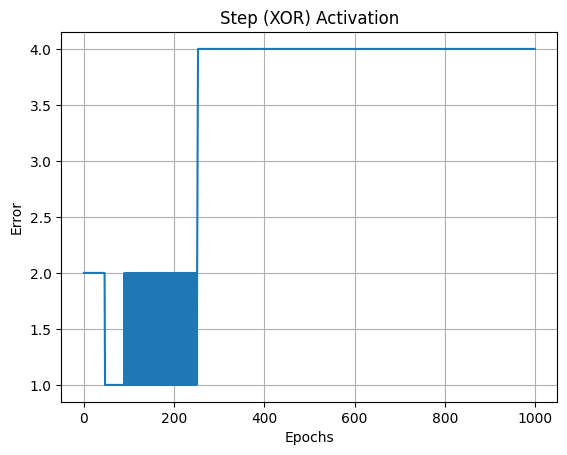

Final Weights: [-0.1 -0.1], Final Bias: 0.09999999999999236


In [11]:
# XOR Gate inputs and outputs
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR gate inputs
xor_outputs = np.array([0, 1, 1, 0])  # XOR gate outputs

# Test Step Activation for XOR Gate
test_activation_function(epochs, xor_inputs, xor_outputs, step_activation, "Step (XOR)")


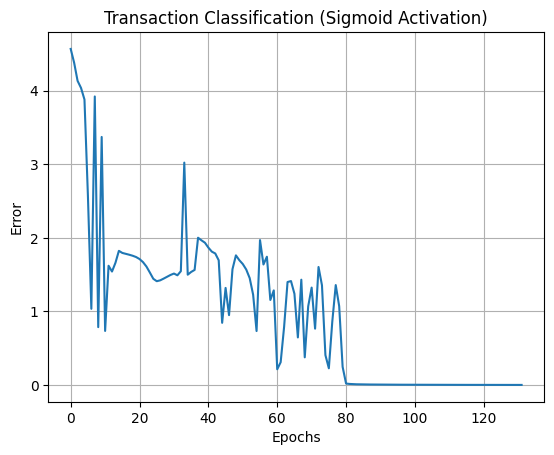

Final Weights: [-1.28079596  8.82567102 -0.02030702], Final Bias: -0.831852536673492


In [13]:
# Customer transaction data (features) and high-value transactions (labels)
# Function to classify transactions using perceptron learning
def classify_transactions(epochs, inputs, outputs, activation_func):
    weights = np.random.randn(inputs.shape[1])  # Random initial weights
    bias = np.random.randn()  # Random initial bias
    learning_rate = 0.05
    final_weights, final_bias, errors = perceptron_learning(epochs, inputs, outputs, weights, bias, learning_rate, activation_func)
    plot_errors(errors, "Transaction Classification (Sigmoid Activation)")
    print(f"Final Weights: {final_weights}, Final Bias: {final_bias}")

customer_data = np.array([
    [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2], [24, 4, 2],
    [22, 1, 5], [15, 4, 2], [18, 4, 2], [21, 1, 4], [16, 2, 4]
])
high_value = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # High-value transactions

# Classify using Sigmoid Activation Function
classify_transactions(epochs, customer_data, high_value, sigmoid_activation)


In [14]:
# Pseudo-Inverse classification
def pseudo_inverse_classification(inputs, outputs):
    X = np.insert(inputs, 0, 1, axis=1)  # Adding bias term
    weights = np.linalg.pinv(X).dot(outputs)
    print(f"Pseudo-Inverse Weights: {weights}")

# Apply Matrix Pseudo-Inverse Method
pseudo_inverse_classification(customer_data, high_value)


Pseudo-Inverse Weights: [ 0.1139903  -0.02342675  0.2607237   0.03727212]


In [15]:
from sklearn.neural_network import MLPClassifier

# AND Gate with MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlp.fit(inputs, outputs)
print("MLPClassifier (AND Gate):", mlp.predict(inputs))

# XOR Gate with MLPClassifier
mlp.fit(xor_inputs, xor_outputs)
print("MLPClassifier (XOR Gate):", mlp.predict(xor_inputs))

# Customer Data with MLPClassifier
mlp.fit(customer_data, high_value)
print("MLPClassifier (Customer Data):", mlp.predict(customer_data))


MLPClassifier (AND Gate): [0 0 0 1]
MLPClassifier (XOR Gate): [1 0 1 0]
MLPClassifier (Customer Data): [1 1 1 0 1 0 1 1 0 0]
